In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import  matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np 
%matplotlib inline

In [2]:
#reading data
df=pd.read_csv('pd_speech_features.csv',index_col=0, delimiter=',', skiprows=1)

In [3]:
df

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,,,,,,,,,,,,,,,,,,,,,
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0


In [4]:
#dropping duplicate columns
df = df.loc[:,~df.columns.duplicated()]

In [5]:
df=df.sample(frac=1).reset_index(drop=True)

In [6]:
df.apply(lambda x: sum(x.isnull()),axis=0)

gender                       0
PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 754, dtype: int64

In [7]:
df

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,0.85374,0.76597,0.39811,416,415,0.004649,0.000084,0.00231,1.070000e-05,...,10.1883,6.7917,3.0096,2.3981,2.9229,4.1730,4.5809,2.8216,2.7978,1
1,1,0.83688,0.59464,0.57059,313,312,0.006168,0.000072,0.00171,1.060000e-05,...,65.0107,16.7081,4.5445,2.6795,2.7662,2.7253,3.2968,3.3047,3.8903,1
2,1,0.85127,0.69896,0.56694,232,231,0.008314,0.000083,0.00148,1.230000e-05,...,1.6378,9.5337,75.5998,40.4622,17.8039,10.1614,4.3219,3.2261,6.0101,0
3,1,0.76380,0.76449,0.45718,272,271,0.007099,0.000094,0.00200,1.420000e-05,...,2.0136,22.4878,6.9231,3.6189,4.0993,5.5304,5.1562,4.6983,3.0422,1
4,1,0.53384,0.74257,0.76349,250,244,0.007239,0.001125,0.00739,5.350000e-05,...,3.2079,7.6563,6.2605,6.0716,7.0607,8.1151,8.7994,8.1001,7.7602,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,1,0.78411,0.64519,0.46165,193,192,0.009998,0.003161,0.00448,4.480000e-05,...,83.0645,9.6427,4.5226,7.6517,7.5058,5.1106,4.6773,4.5204,3.6431,0
752,0,0.80259,0.55221,0.20741,602,601,0.003207,0.000017,0.00021,6.860000e-07,...,59.7797,33.1091,10.7541,4.2978,3.5306,3.1090,2.7442,3.5607,3.6258,0
753,0,0.83844,0.56677,0.31278,387,386,0.004986,0.000039,0.00079,3.930000e-06,...,17.6232,16.9123,14.9890,18.2147,40.3656,66.5518,38.3632,31.1193,9.4326,0
754,0,0.81319,0.69447,0.42782,346,345,0.005589,0.000076,0.00076,4.280000e-06,...,2.7181,2.0719,2.4063,3.2230,3.1039,3.0872,6.0785,10.4712,14.0198,1


In [8]:
#Plotting data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

<AxesSubplot:xlabel='class', ylabel='count'>

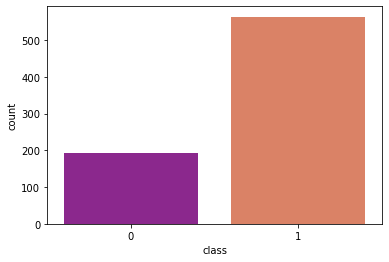

In [9]:
sns.countplot(data=df,x = 'class',palette='plasma')

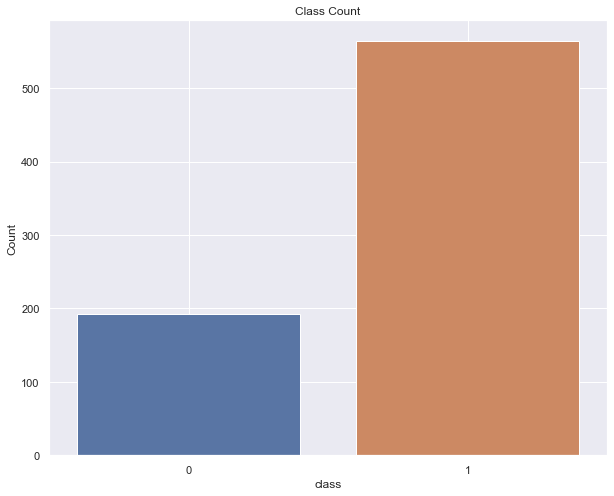

In [10]:
sns.set(rc={'figure.figsize':(10,8)})
fig = sns.countplot(x = "class" , data = df)
plt.xlabel("class")
plt.ylabel("Count")
plt.title("Class Count")
plt.grid(True)
plt.show(fig)

In [11]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
df.columns

Index(['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       'locAbsJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=754)

In [13]:
dataX = df.drop('class',axis=1)
dataY = df['class']

In [14]:
#shuffling and splitting data to test X and y and train X and y 
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.3,random_state=42,shuffle=True)

In [15]:
y_train

182    1
575    0
399    1
583    1
223    0
      ..
71     1
106    1
270    1
435    1
102    1
Name: class, Length: 529, dtype: int64

In [16]:
y_train2=y_train.tolist()

In [17]:
y_train2

[1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,


In [18]:
y_test

408    1
97     1
424    1
584    1
603    1
      ..
595    0
239    1
250    0
538    1
494    1
Name: class, Length: 227, dtype: int64

In [19]:
y_test2=y_test.tolist()
y_test2

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1]

In [20]:
y_pred1=[]
for i in range(len(y_train)):
    y_pred1.append(1)

In [21]:
y_pred2=[]
for i in range(len(y_test)):
    y_pred2.append(1)

In [22]:
y_pred1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [23]:
#calculating accuracy percentage between two lists
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
 
# Test accuracy
actual = y_train2
predicted = y_pred1
accuracy = accuracy_metric(actual, predicted)
print(accuracy)

73.34593572778829


In [24]:
actual = y_test2
predicted = y_pred2
accuracy = accuracy_metric(actual, predicted)
print(accuracy)

77.5330396475771


In [25]:
print(f'Training Shape x:',X_train.shape)
print(f'Testing Shape x:',X_test.shape)
print('\n')
print(f'Training Shape y:',dataX.shape)
print(f'Testing Shape y:',dataY.shape)

Training Shape x: (529, 753)
Testing Shape x: (227, 753)


Training Shape y: (756, 753)
Testing Shape y: (756,)


In [26]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test= ss.transform(X_test)

In [27]:
#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

#Create svm

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)
scores = cross_val_score(svm, dataX, dataY, cv=5, scoring='accuracy') 
print(scores)
print("Train accuracy:",svm.score(X_train,y_train))
print("Test accuracy:",svm.score(X_test,y_test))

y_pred = svm.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, svm.predict(X_test),zero_division=0))

[0.74342105 0.74834437 0.74834437 0.74834437 0.74172185]
Train accuracy: 1.0
Test accuracy: 0.775330396475771
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
CM: [[  0  51]
 [  0 176]]
Accuracy: 77.5330396475771 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.78      1.00      0.87       176

    accuracy                           0.78       227
   macro avg       0.39      0.50      0.44       227
weighted avg       0.60      0.78      0.68       227



In [28]:
#Applying KNN
from sklearn.neighbors import KNeighborsClassifier

# build KNN model and choose n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
scores = cross_val_score(knn, dataX, dataY, cv=5, scoring='accuracy') 
print(scores)
print("Train accuracy:",knn.score(X_train,y_train))
print("Test accuracy:",knn.score(X_test,y_test))

y_pred = knn.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, knn.predict(X_test)))

[0.76315789 0.76821192 0.73509934 0.70198675 0.75496689]
Train accuracy: 0.8998109640831758
Test accuracy: 0.8898678414096917
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1
 0 1 0 1 1]
CM: [[ 30  21]
 [  4 172]]
Accuracy: 88.98678414096916 %
              precision    recall  f1-score   support

           0       0.88      0.59      0.71        51
           1       0.89      0.98      0.93       176

    accuracy                           0.89       227
   macro avg       0.89      0.78      0.82       227
weighted avg       0.89      0.89      0.88       227



In [29]:
#Decision Tree
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(X_train, y_train)
scores = cross_val_score(decision_tree, dataX, dataY, cv=5, scoring='accuracy') 
print(scores)
print("Train accuracy:",decision_tree.score(X_train,y_train))
print("Test accuracy:",decision_tree.score(X_test,y_test))

y_pred = decision_tree.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, decision_tree.predict(X_test)))

[0.84210526 0.81456954 0.8013245  0.81456954 0.81456954]
Train accuracy: 1.0
Test accuracy: 0.8105726872246696
[0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 1 1 0 1 1]
CM: [[ 33  18]
 [ 25 151]]
Accuracy: 81.05726872246696 %
              precision    recall  f1-score   support

           0       0.57      0.65      0.61        51
           1       0.89      0.86      0.88       176

    accuracy                           0.81       227
   macro avg       0.73      0.75      0.74       227
weighted avg       0.82      0.81      0.81       227



In [30]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(X_train, y_train)
scores = cross_val_score(random_forest, dataX, dataY, cv=5, scoring='accuracy') 
print(scores)
print("Train accuracy:",random_forest.score(X_train,y_train))
print("Test accuracy:",random_forest.score(X_test,y_test))

y_pred = random_forest.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, random_forest.predict(X_test)))

[0.88157895 0.88741722 0.83443709 0.86092715 0.89403974]
Train accuracy: 1.0
Test accuracy: 0.8986784140969163
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 0 1 1]
CM: [[ 31  20]
 [  3 173]]
Accuracy: 89.86784140969164 %
              precision    recall  f1-score   support

           0       0.91      0.61      0.73        51
           1       0.90      0.98      0.94       176

    accuracy                           0.90       227
   macro avg       0.90      0.80      0.83       227
weighted avg       0.90      0.90      0.89       227



In [31]:
#performing PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=10)

#determining transformed features

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [32]:
#performing Support Vector Classification (SVC)
from sklearn.svm import SVC

#Construct SVM
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_pca, y_train)
scores = cross_val_score(svm, dataX, dataY, cv=5, scoring='accuracy') 
print(scores)
print("Train accuracy:",svm.score(X_train_pca,y_train))
print("Test accuracy:",svm.score(X_test_pca,y_test))

y_pred = svm.predict(X_test_pca)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, svm.predict(X_test_pca),zero_division=0))

[0.74342105 0.74834437 0.74834437 0.74834437 0.74172185]
Train accuracy: 0.998109640831758
Test accuracy: 0.8105726872246696
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1]
CM: [[  8  43]
 [  0 176]]
Accuracy: 81.05726872246696 %
              precision    recall  f1-score   support

           0       1.00      0.16      0.27        51
           1       0.80      1.00      0.89       176

    accuracy                           0.81       227
   macro avg       0.90      0.58      0.58       227
weighted avg       0.85      0.81      0.75       227



In [33]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

#constructing KNN model
#choosing n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_pca, y_train)
scores = cross_val_score(knn, dataX, dataY, cv=5, scoring='accuracy') 
print(scores)
print("Train accuracy:",knn.score(X_train_pca,y_train))
print("Test accuracy:",knn.score(X_test_pca,y_test))

y_pred = knn.predict(X_test_pca)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, knn.predict(X_test_pca)))

[0.76315789 0.76821192 0.73509934 0.70198675 0.75496689]
Train accuracy: 0.9111531190926276
Test accuracy: 0.8634361233480177
[1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 0 1 0 1 1]
CM: [[ 30  21]
 [ 10 166]]
Accuracy: 86.34361233480176 %
              precision    recall  f1-score   support

           0       0.75      0.59      0.66        51
           1       0.89      0.94      0.91       176

    accuracy                           0.86       227
   macro avg       0.82      0.77      0.79       227
weighted avg       0.86      0.86      0.86       227



In [34]:
#Decision Tree
from sklearn import tree

#constructing tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(X_train_pca, y_train)
scores = cross_val_score(decision_tree, dataX, dataY, cv=5, scoring='accuracy') 
print(scores)
print("Train accuracy:",decision_tree.score(X_train_pca,y_train))
print("Test accuracy:",decision_tree.score(X_test_pca,y_test))

y_pred = decision_tree.predict(X_test_pca)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, decision_tree.predict(X_test_pca)))

[0.85526316 0.82119205 0.81456954 0.81456954 0.82781457]
Train accuracy: 1.0
Test accuracy: 0.7973568281938326
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1]
CM: [[ 28  23]
 [ 23 153]]
Accuracy: 79.73568281938326 %
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        51
           1       0.87      0.87      0.87       176

    accuracy                           0.80       227
   macro avg       0.71      0.71      0.71       227
weighted avg       0.80      0.80      0.80       227



In [35]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

#construct Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(X_train_pca, y_train)
scores = cross_val_score(random_forest, dataX, dataY, cv=5, scoring='accuracy') 
print(scores)
print("Train accuracy:",random_forest.score(X_train_pca,y_train))
print("Test accuracy:",random_forest.score(X_test_pca,y_test))

y_pred = random_forest.predict(X_test_pca)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, random_forest.predict(X_test_pca)))

[0.89473684 0.89403974 0.84768212 0.86092715 0.88741722]
Train accuracy: 1.0
Test accuracy: 0.8722466960352423
[1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1
 1 1 0 1 1]
CM: [[ 29  22]
 [  7 169]]
Accuracy: 87.22466960352423 %
              precision    recall  f1-score   support

           0       0.81      0.57      0.67        51
           1       0.88      0.96      0.92       176

    accuracy                           0.87       227
   macro avg       0.85      0.76      0.79       227
weighted avg       0.87      0.87      0.86       227



# :نتیجه گیری

به جهت افزایش دقت حذف شد id ستون

 بیشترین دقت را دارد Random Forest  با مقایسه دقت کلی مشاهده می شود که مدل 

استفاده از فیجر اکسترکشن تاثیر خوبی روی مدل ها به خصوص مدل ساپورت وکتور ماشین دارد که به مقدار کامپوننت ۱۰ معیارهای ماتریس پیچیدگی به مقدار رضایت بخشی رسید (چون قبل آن برای همه ی داده ها عدد ۱ پیش بینی می شد.)   

تاثیر خوبی گذاشت svm روی دقت مدل PCA